In [46]:
import open3d as o

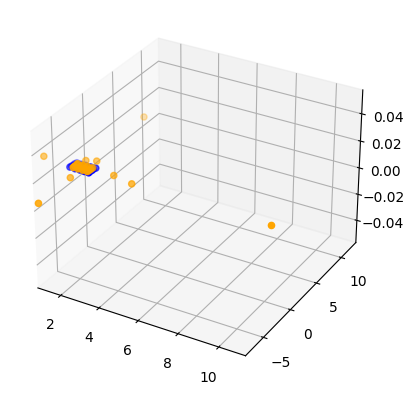

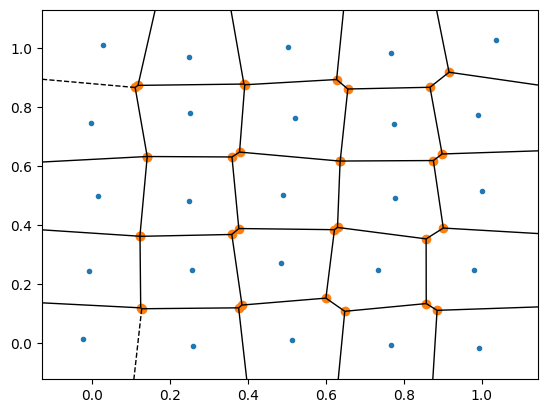

(array([[-0.02195326,  0.01253704,  0.        ],
       [ 0.25922087, -0.01112379,  0.        ],
       [ 0.51476841,  0.01074874,  0.        ],
       [ 0.76730852, -0.00763372,  0.        ],
       [ 0.99170165, -0.01812881,  0.        ],
       [-0.00627567,  0.24558383,  0.        ],
       [ 0.25598157,  0.24753897,  0.        ],
       [ 0.48618375,  0.27262638,  0.        ],
       [ 0.73505279,  0.24915578,  0.        ],
       [ 0.9796881 ,  0.24945466,  0.        ],
       [ 0.01580042,  0.49986563,  0.        ],
       [ 0.24961174,  0.48359003,  0.        ],
       [ 0.4898    ,  0.5009958 ,  0.        ],
       [ 0.77666787,  0.49249264,  0.        ],
       [ 1.00031554,  0.51731342,  0.        ],
       [-0.00135536,  0.74693371,  0.        ],
       [ 0.25169802,  0.78036364,  0.        ],
       [ 0.52108515,  0.76458641,  0.        ],
       [ 0.77490304,  0.74429118,  0.        ],
       [ 0.98921426,  0.77376829,  0.        ],
       [ 0.02935636,  1.00955739,  0.  

In [171]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
from mpl_toolkits.mplot3d import Axes3D
# 1.0*1.0*1.0の3次元領域上の点群(一平面上になる)を生成
# パラメータ: var:点の分散, num:生成する点の数 = num^2
def make_points(var, num):
    x = np.linspace(0, 1, num)
    mesh_x, mesh_y = np.meshgrid(x, x)
    z = 0
    xyz = np.zeros((np.size(mesh_x), 3))
    xyz[:, 0] = np.reshape(mesh_x, -1)
    xyz[:, 1] = np.reshape(mesh_y, -1)
    xyz[:, 2] = np.reshape(0, -1)
    
    xe = np.random.normal(loc = 0, scale = var, size = num*num)
    ye = np.random.normal(loc = 0, scale = var, size = num*num)
    
    xyz[:, 0] = xyz[:, 0] + xe
    xyz[:, 1] = xyz[:, 1] + ye

    voi_seed = np.array([np.array([x, y]) for (x, y) in zip(xyz[:, 0], xyz[:, 1])])
    vor = Voronoi(voi_seed)
    
    voi_V = vor.vertices
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    fig = voronoi_plot_2d(vor)

    ax.scatter(xyz[:, 0], xyz[:, 1], color='blue')
    ax.scatter(voi_V[:, 0], voi_V[:, 1], color='orange')
    
    plt.show()
    
    return xyz, voi_V

print(make_points(0.015, 5))

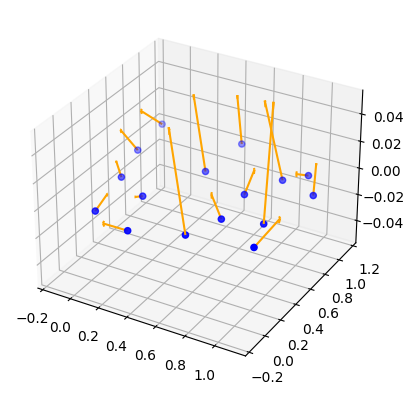

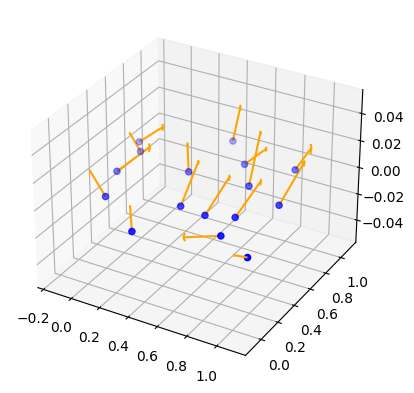

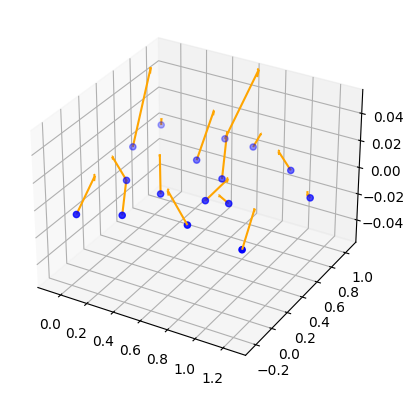

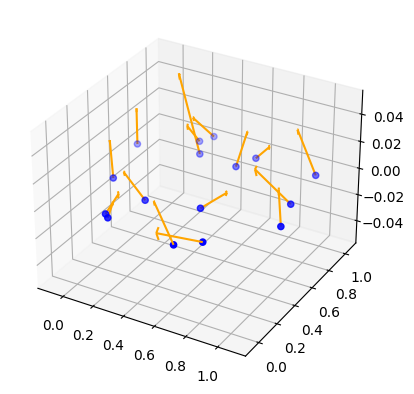

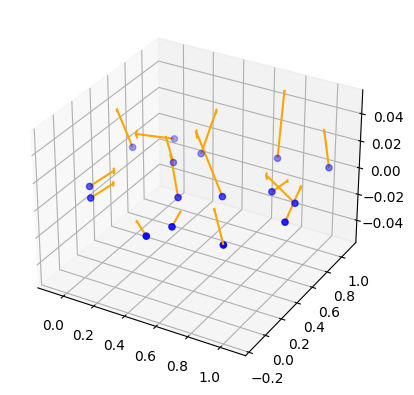

In [183]:
def make_points(var, num, Lvar, Vvar):
    x = np.linspace(0, 1, num)
    mesh_x, mesh_y = np.meshgrid(x, x)
    z = 0
    xyz = np.zeros((np.size(mesh_x), 3))
    xyz[:, 0] = np.reshape(mesh_x, -1)
    xyz[:, 1] = np.reshape(mesh_y, -1)
    xyz[:, 2] = np.reshape(0, -1)
    
    xe = np.random.normal(loc = 0, scale = var, size = num*num)
    ye = np.random.normal(loc = 0, scale = var, size = num*num)
    
    xyz[:, 0] = xyz[:, 0] + xe
    xyz[:, 1] = xyz[:, 1] + ye
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    #vectors
    Vxyz = np.zeros((np.size(mesh_x), 3))
    Vxyz[:, 0] = np.random.normal(loc = 0, scale = Vvar, size = num*num)
    Vxyz[:, 1] = np.random.normal(loc = 0, scale = Vvar, size = num*num)
    Vxyz[:, 2] = abs(np.random.normal(loc = 0, scale = Lvar, size = num*num))
    
    for (x, y, z, vx, vy, vz) in zip(xyz[:, 0], xyz[:, 1], xyz[:, 2], Vxyz[:, 0], Vxyz[:, 1], Vxyz[:, 2]):
        ax.quiver(x, y, z, vx, vy, vz,color = "orange", length = 0.1, arrow_length_ratio = 0.05)
    
    ax.scatter(xyz[:, 0], xyz[:, 1], color='blue')

    plt.show()
    
    #hex
    
    return xyz, Vxyz

for i in range(5):
    make_points(0.1, 4, 0.3, 1)